In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sbn
sbn.set()
matplotlib.rcParams['figure.dpi'] = 300

In [2]:
def moving_average(a, n=3):
    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# EASY

In [3]:
with open('normal_easy_steps', 'r') as nfile:
    normal_easy_steps = nfile.readline()
normal_easy_steps = [int(x) for x in normal_easy_steps[1:-1].split(',')]

with open('her_easy_steps', 'r') as nfile:
    her_easy_steps = nfile.readline()
her_easy_steps = [int(x) for x in her_easy_steps[1:-1].split(',')]

with open('dher_easy_steps', 'r') as nfile:
    dher_easy_steps = nfile.readline()
dher_easy_steps = [int(x) for x in dher_easy_steps[1:-1].split(',')]

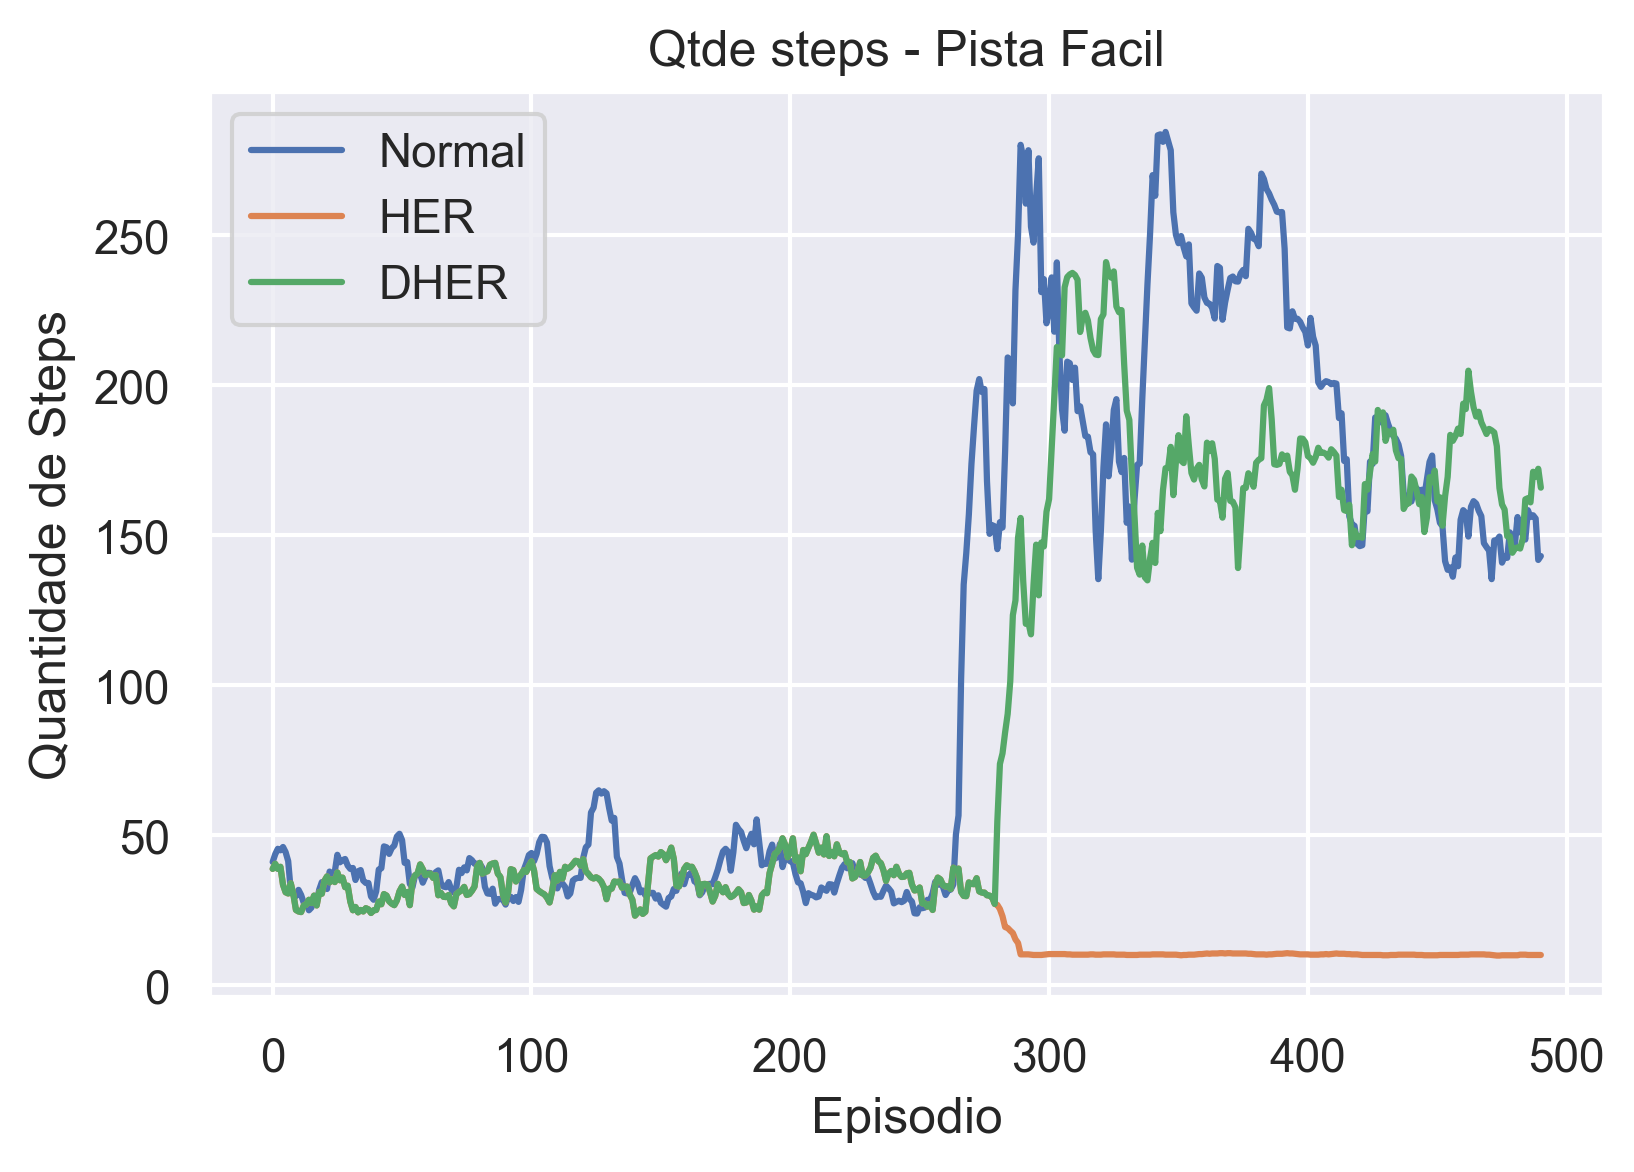

In [4]:
plt.plot(moving_average(normal_easy_steps, 10))
plt.plot(moving_average(her_easy_steps, 10))
plt.plot(moving_average(dher_easy_steps,10))
plt.legend(['Normal', 'HER', 'DHER'])
plt.xlabel('Episodio')
plt.ylabel('Quantidade de Steps')
plt.title('Qtde steps - Pista Facil')
plt.savefig('qtd_steps_easy')

# HARD

In [5]:
with open('normal_hard_steps', 'r') as nfile:
    normal_hard_steps = nfile.readline()
normal_hard_steps = [int(x) for x in normal_hard_steps[1:-1].split(',')]

with open('her_hard_steps', 'r') as nfile:
    her_hard_steps = nfile.readline()
her_hard_steps = [int(x) for x in her_hard_steps[1:-1].split(',')]

with open('dher_hard_steps', 'r') as nfile:
    dher_hard_steps = nfile.readline()
dher_hard_steps = [int(x) for x in dher_hard_steps[1:-1].split(',')]

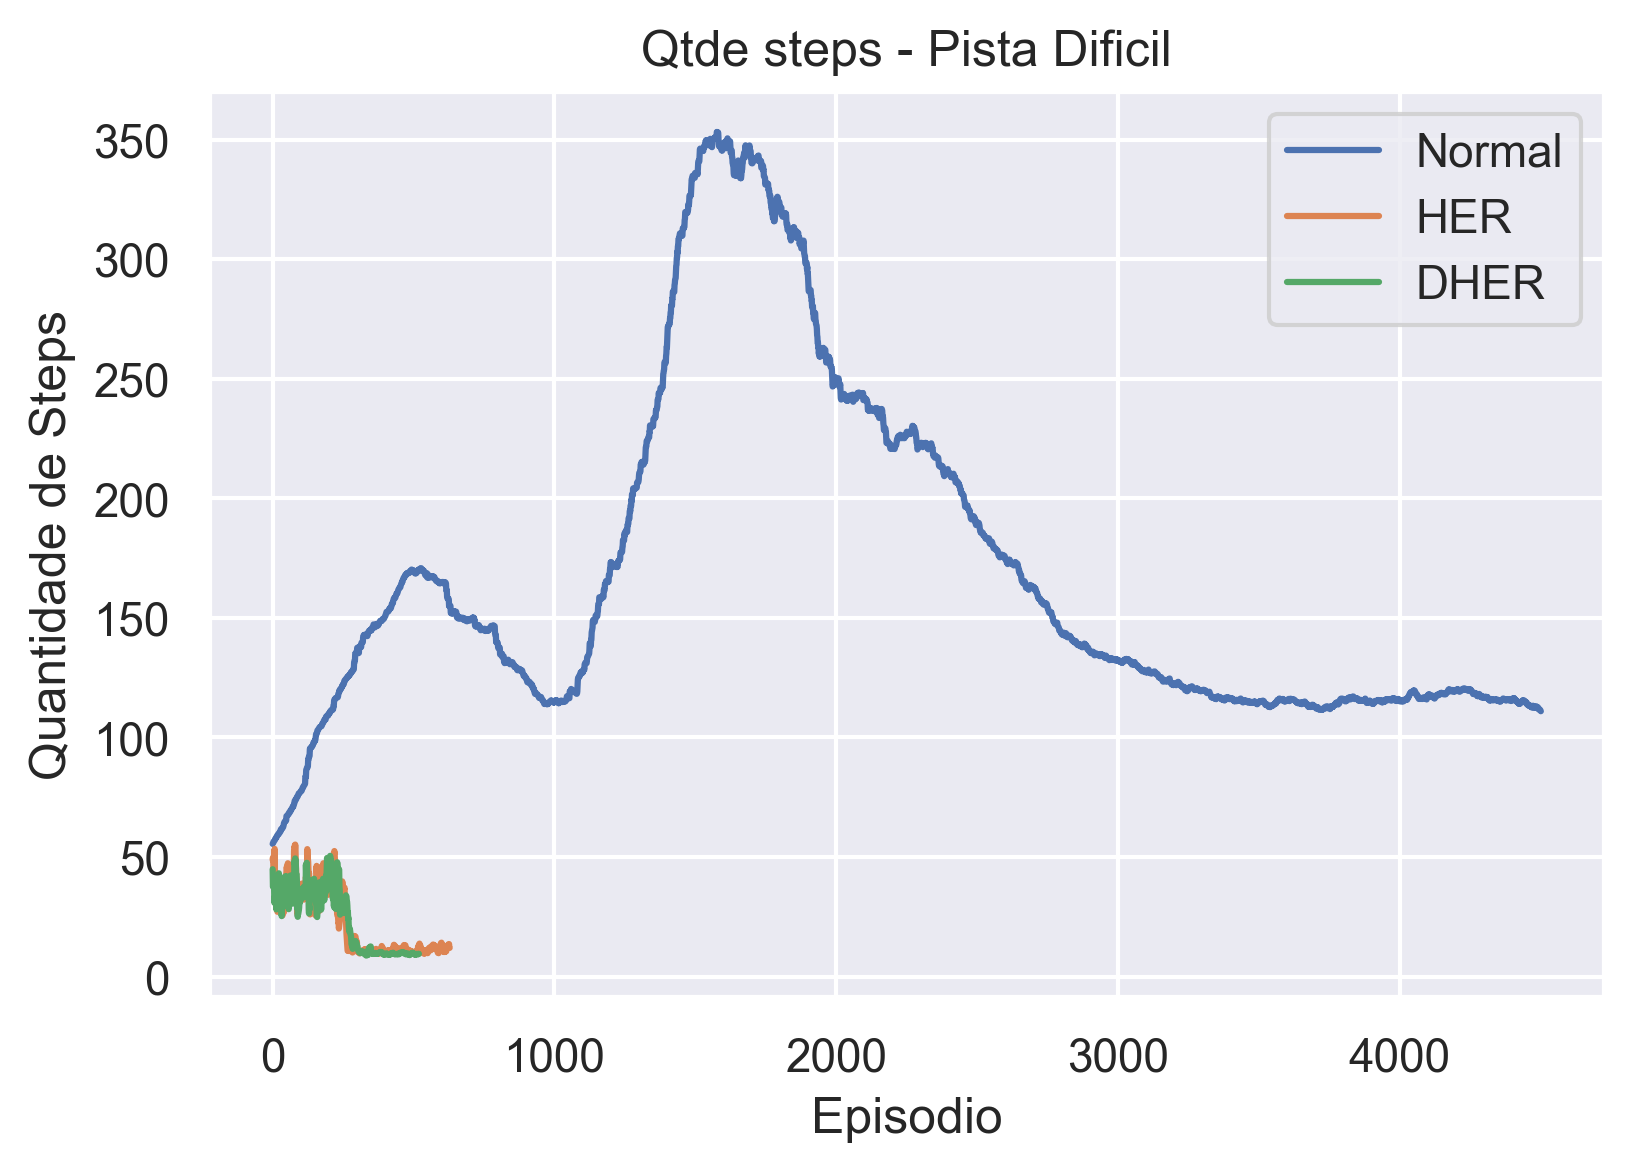

In [6]:
plt.plot(moving_average(normal_hard_steps, 500))
plt.plot(moving_average(her_hard_steps, 10))
plt.plot(moving_average(dher_hard_steps,10))
plt.legend(['Normal', 'HER', 'DHER'])
plt.xlabel('Episodio')
plt.ylabel('Quantidade de Steps')
plt.title('Qtde steps - Pista Dificil')
plt.savefig('qtd_steps_hard')

In [7]:
with open('wandb/run-20200902_190039-337rfhno/output.log', 'r') as lfile:
    data = lfile.readlines()

dones_idx = [i for i, x in enumerate(data) if x == 'TRACK DONE\n']
normal_easy_done = []
normal_easy_done_idx = []
for idx in dones_idx:
    l = data[idx+1]
    if 'Episode' in l:
        normal_easy_done_idx.append(int(l.split(',')[0].split(': ')[1]))
        normal_easy_done.append(int(l.split(',')[2].split(': ')[1]))

with open('wandb/run-20200902_202545-38fe8gs3/output.log', 'r') as lfile:
    data = lfile.readlines()

dones_idx = [i for i, x in enumerate(data) if x == 'TRACK DONE\n']
dher_easy_done = []
dher_easy_done_idx = []
for idx in dones_idx:
    l = data[idx+1]
    if 'Episode' in l:
        dher_easy_done_idx.append(int(l.split(',')[0].split(': ')[1]))
        dher_easy_done.append(int(l.split(',')[2].split(': ')[1]))


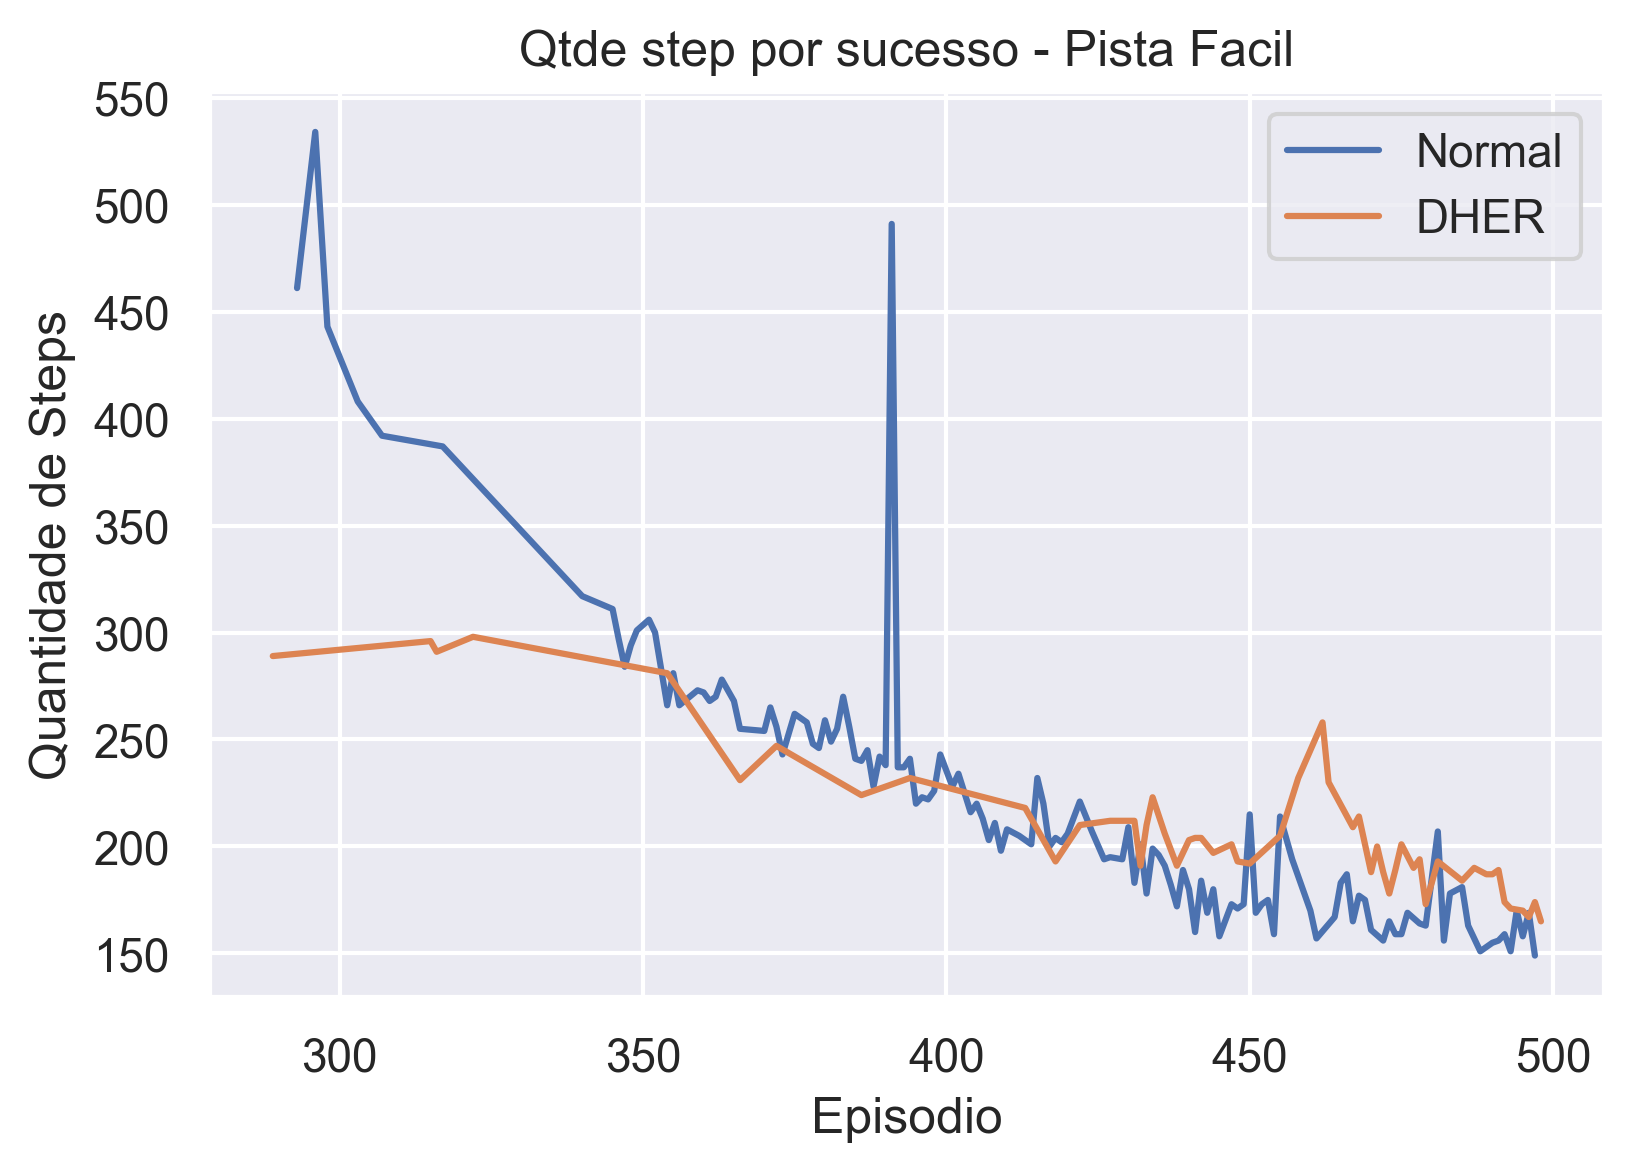

In [8]:
plt.plot(normal_easy_done_idx, normal_easy_done)
plt.plot(dher_easy_done_idx, dher_easy_done)
plt.legend(['Normal', 'DHER'])
plt.xlabel('Episodio')
plt.ylabel('Quantidade de Steps')
plt.title('Qtde step por sucesso - Pista Facil')
plt.savefig('done_steps_easy')

In [9]:
with open('wandb/run-20200902_224130-1cwttgxg/output.log', 'r') as lfile:
    data = lfile.readlines()

dones_idx = [i for i, x in enumerate(data) if x == 'TRACK DONE\n']
normal_hard_one_done = []
normal_hard_done_idx = []
for idx in dones_idx:
    l = data[idx+1]
    if 'Episode' in l:
        normal_hard_done_idx.append(int(l.split(',')[0].split(': ')[1]))
        normal_hard_one_done.append(int(l.split(',')[2].split(': ')[1]))

with open('wandb/run-20200903_021754-2z0kfc0b/output.log', 'r') as lfile:
    data = lfile.readlines()

dones_idx = [i for i, x in enumerate(data) if x == 'TRACK DONE\n']
normal_hard_two_done = []
normal_hard_two_done_idx = []
for idx in dones_idx:
    l = data[idx+1]
    if 'Episode' in l:
        normal_hard_done_idx.append(int(l.split(',')[0].split(': ')[1])+1499)
        normal_hard_two_done.append(int(l.split(',')[2].split(': ')[1]))

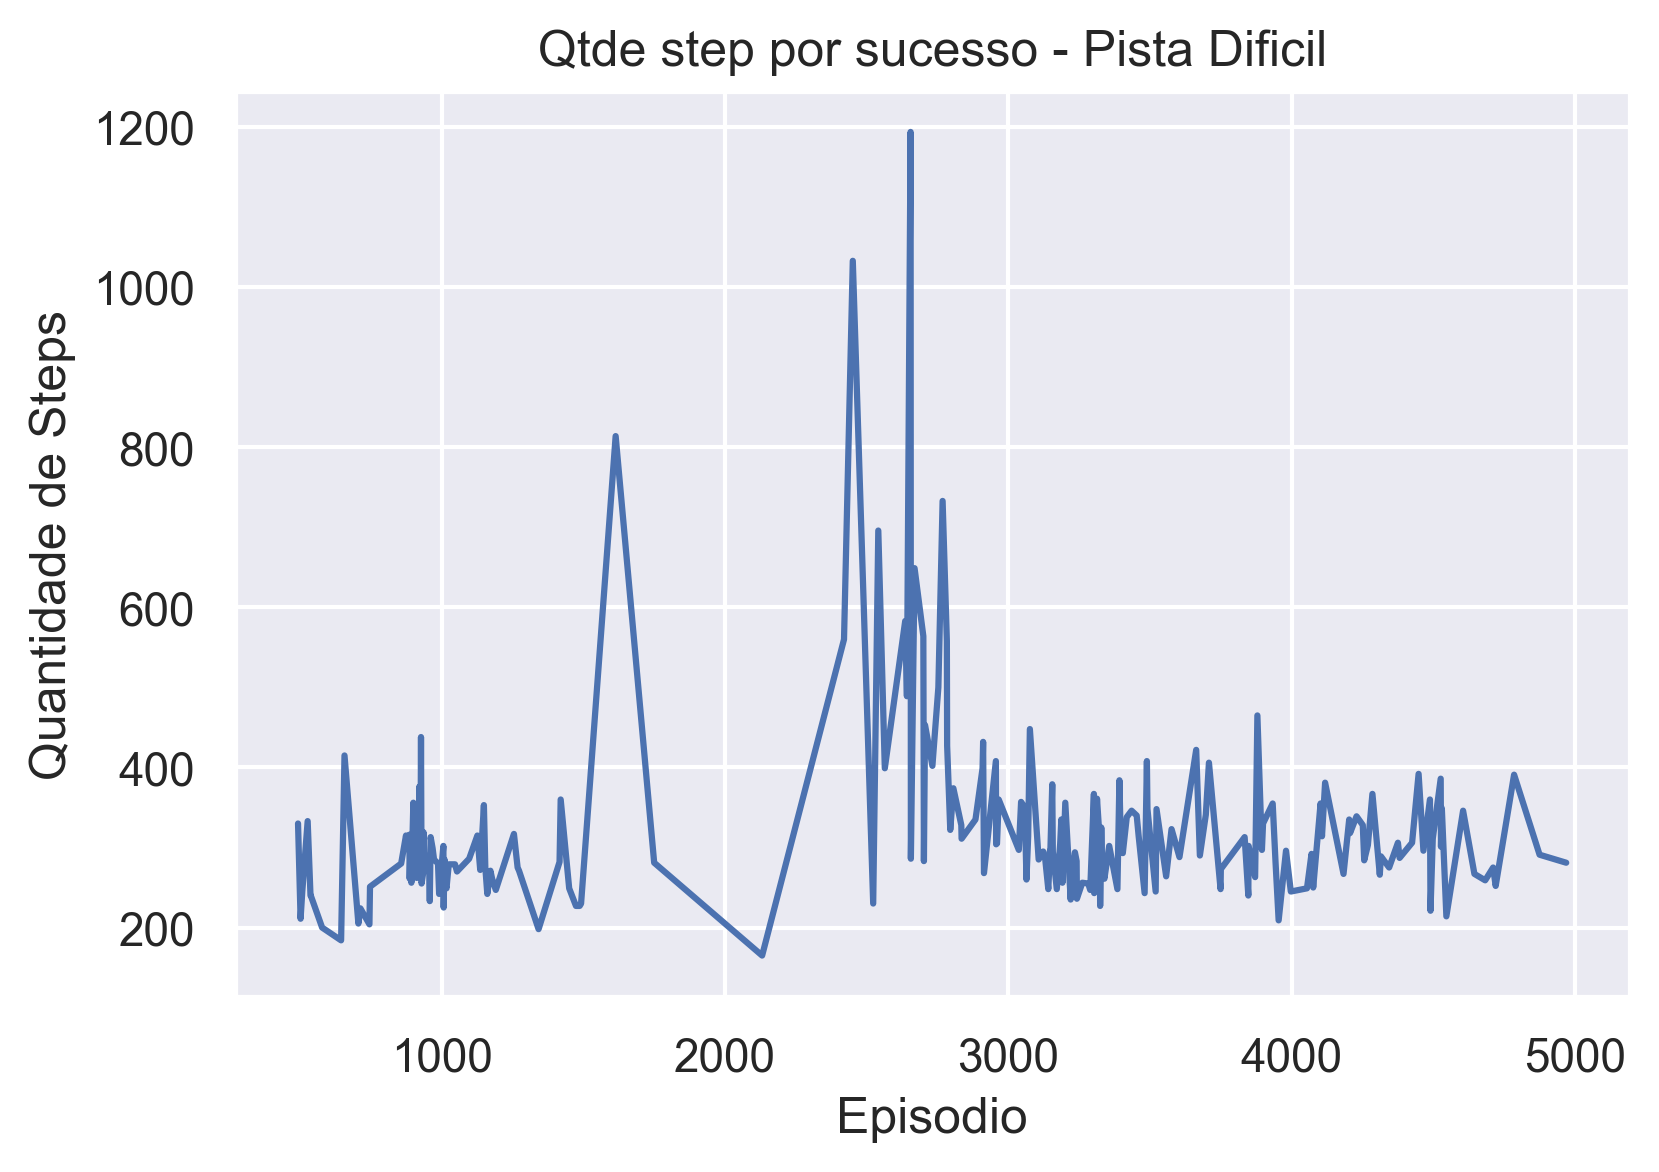

In [10]:
plt.plot(normal_hard_done_idx, normal_hard_one_done + normal_hard_two_done)
plt.xlabel('Episodio')
plt.ylabel('Quantidade de Steps')
plt.title('Qtde step por sucesso - Pista Dificil')
plt.savefig('done_steps_hard')